## Config

In [110]:
# Ensure Frame Around Product Is Sufficiently Wide
frame_boundary_pixels = 3

# Ensure Frame Around Product is Sufficiently Bright
lower_bound_of_acceptable_colors_for_frame = (150, 150, 150)

# Ensure Frame Around Product is Sufficient Neutral
range_of_acceptable_deviation_in_color_channels_in_units = 15

## Imports

In [87]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from typing import List

## Helper Methods

In [88]:
def are_pixels_sufficiently_bright(
    pixels,
    lower_bound_of_pixel_values,
):
    (
        lower_bound_blue_pixel,
        lower_bound_green_pixel,
        lower_bound_red_pixel,
    )= lower_bound_of_pixel_values
    
    for blue_pixel, green_pixel, red_pixel in pixels:
        if (
            blue_pixel < lower_bound_blue_pixel or
            green_pixel < lower_bound_green_pixel or
            red_pixel < lower_bound_red_pixel
        ):
            return False
        
    return True
        
    
def are_pixels_sufficiently_neutral(
    pixels,
    range_of_acceptable_deviation_in_color_channels_in_units,
):    
    for blue_pixel, green_pixel, red_pixel in pixels:
        min_pixel_value = min(
            blue_pixel,
            green_pixel,
            red_pixel,
        )
        
        max_pixel_value = max(
            blue_pixel,
            green_pixel,
            red_pixel,
        )
        
        if (max_pixel_value - min_pixel_value) > range_of_acceptable_deviation_in_color_channels_in_units:
            return False
        
    return True    
        
        

In [89]:
def get_frame_pixels(
    image: np.ndarray,
    frame_boundary_pixels: float,
) -> List[np.ndarray]:
    frame_pixels = []
    
    image_height, image_width, _ = image.shape

    for row_index, row in enumerate(image):        
        for col_index, pixel in enumerate(row):  
            if (
                row_index <= (frame_boundary_pixels) or
                row_index >= (image_height - frame_boundary_pixels) or
                col_index <= (frame_boundary_pixels) or
                col_index >= (image_width - frame_boundary_pixels)                
            ):
                frame_pixels.append(tuple(pixel))
        
    return frame_pixels

In [100]:
def does_image_have_acceptable_zoom(
    image: np.ndarray,
    verbose: bool = False,
) -> bool:
    frame_pixels: List[np.ndarray] = get_frame_pixels(
        image=image,
        frame_boundary_pixels=frame_boundary_pixels,
    )

    pixels_are_sufficiently_bright: bool = are_pixels_sufficiently_bright(
        pixels=frame_pixels,
        lower_bound_of_pixel_values=lower_bound_of_acceptable_colors_for_frame,
    )

    pixels_are_sufficiently_neutral: bool = are_pixels_sufficiently_neutral(
        pixels=frame_pixels,
        range_of_acceptable_deviation_in_color_channels_in_units=range_of_acceptable_deviation_in_color_channels_in_units,
    )
    
    if verbose and not pixels_are_sufficiently_bright:
        print("pixels are not sufficiently bright")
        
    if verbose and not pixels_are_sufficiently_neutral:
        print("pixels are not sufficiently neutral")        
    
    return pixels_are_sufficiently_bright and pixels_are_sufficiently_neutral

## Examples

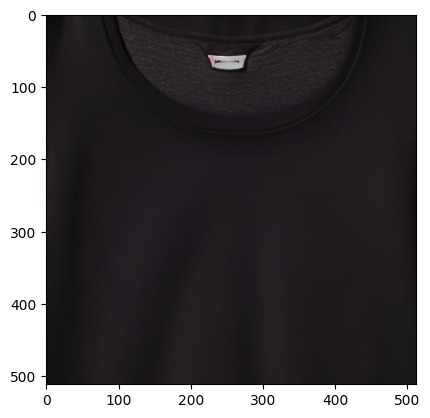

does_image_have_acceptable_zoom: No


In [111]:
image = cv2.imread("bad_image_1.jpeg"); plt.imshow(image); plt.show()

print(f"does_image_have_acceptable_zoom: {'Yes' if does_image_have_acceptable_zoom(image=image) else 'No'}")

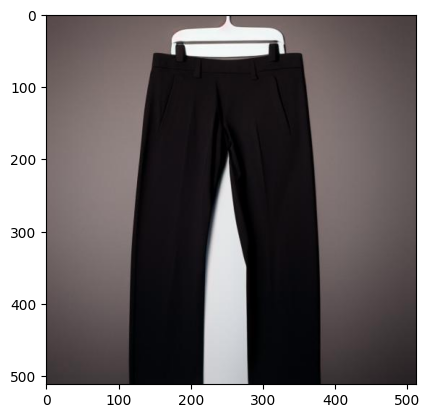

does_image_have_acceptable_zoom: No


In [112]:
image = cv2.imread("bad_image_2.jpeg"); plt.imshow(image); plt.show()

print(f"does_image_have_acceptable_zoom: {'Yes' if does_image_have_acceptable_zoom(image=image) else 'No'}")

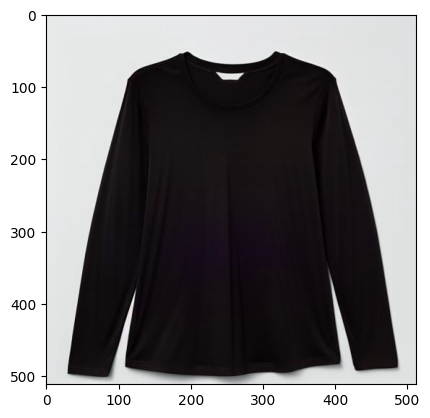

does_image_have_acceptable_zoom: Yes


In [113]:
image = cv2.imread("good_image_1.jpeg"); plt.imshow(image); plt.show()

print(f"does_image_have_acceptable_zoom: {'Yes' if does_image_have_acceptable_zoom(image=image, verbose=True) else 'No'}")

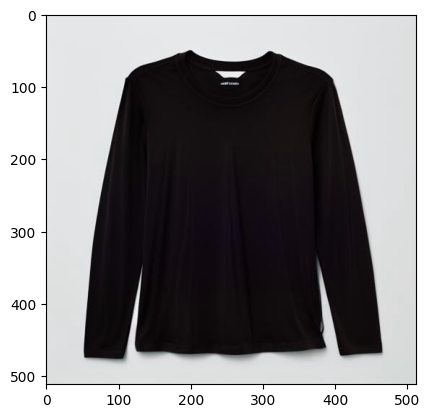

does_image_have_acceptable_zoom: Yes


In [114]:
image = cv2.imread("good_image_2.jpeg"); plt.imshow(image); plt.show()

print(f"does_image_have_acceptable_zoom: {'Yes' if does_image_have_acceptable_zoom(image=image, verbose=True) else 'No'}")